In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Data/UC_gen_2020.gz',
                     dtype={'voting_method': str},
                     usecols=['party_cd',
                              'birth_state', 
                              'voting_method'])
df.head()

,voting_method,party_cd,birth_state
0,ABSENTEE ONESTOP,REP,NC
1,NaN,UNA,MA
2,ABSENTEE ONESTOP,DEM,MN
3,NaN,REP,NY
4,ABSENTEE ONESTOP,DEM,NC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   voting_method  131483 non-null  object
 1   party_cd       168070 non-null  object
 2   birth_state    127298 non-null  object
dtypes: object(3)
memory usage: 3.8+ MB


In [4]:
df['voting_method'].fillna(value='No Vote', inplace=True)

In [5]:
df.head()

,voting_method,party_cd,birth_state
0,ABSENTEE ONESTOP,REP,NC
1,No Vote,UNA,MA
2,ABSENTEE ONESTOP,DEM,MN
3,No Vote,REP,NY
4,ABSENTEE ONESTOP,DEM,NC


In [6]:
df['birth_state'].fillna(value='Missing', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   voting_method  168070 non-null  object
 1   party_cd       168070 non-null  object
 2   birth_state    168070 non-null  object
dtypes: object(3)
memory usage: 3.8+ MB


In [8]:
def check_unique(col, df, dropna=False):

    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    return unique_vals

In [9]:
def plot_count(variable, data, rotation=0, ha='center', figsize=(8,6)):
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=data[variable],
                       order=data[variable].value_counts().index,
                       palette='nipy_spectral')
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=rotation,
                       horizontalalignment=ha,
                       fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Counts', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

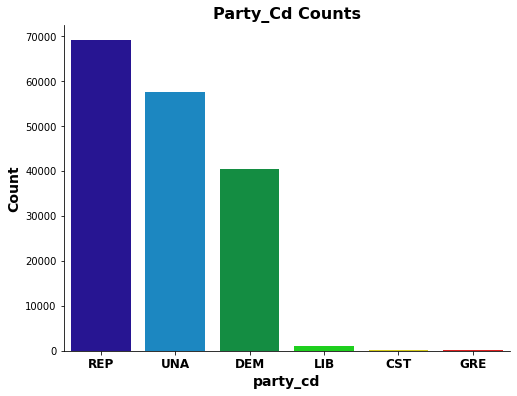

In [23]:
plot_count('party_cd', df)
plt.savefig('Figures/blog_bin_cat_features/party_cd_count', bbox_inches = "tight");

In [11]:
## Check distribution
check_unique('party_cd', df)

,count,%
REP,69079,41.10
UNA,57488,34.20
DEM,40340,24.00
LIB,995,0.59
CST,96,0.06
GRE,72,0.04


In [12]:
## Create new column grouping most infrequent party categories
  ## into same group as those who are unaffiliated
df['party_grp'] = np.where(df['party_cd'].isin(['REP', 'DEM']),
                           df['party_cd'].str.title(),
                           'Other')

## Check distribution
check_unique('party_grp', df)

,count,%
Rep,69079,41.1
Other,58651,34.9
Dem,40340,24.0


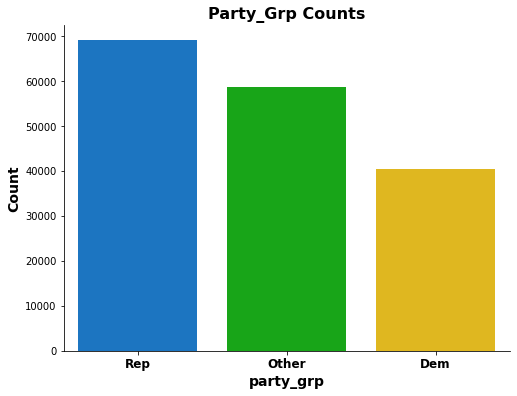

In [13]:
plot_count('party_grp', df);

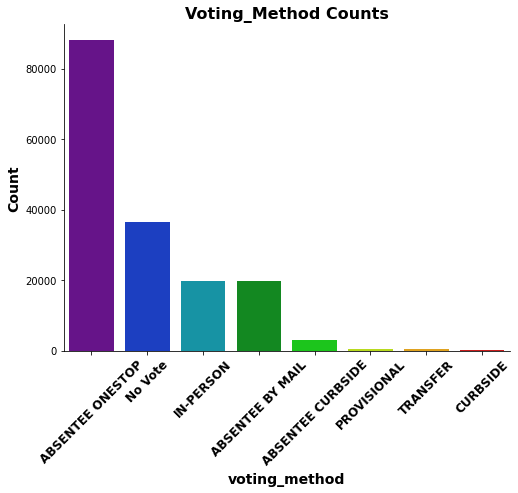

In [24]:
plot_count('voting_method', df, rotation=45)
plt.savefig('Figures/blog_bin_cat_features/voting_method_count', bbox_inches = "tight");

In [15]:
check_unique('voting_method', df)

,count,%
ABSENTEE ONESTOP,88137,52.44
No Vote,36587,21.77
IN-PERSON,19813,11.79
ABSENTEE BY MAIL,19647,11.69
ABSENTEE CURBSIDE,2951,1.76
PROVISIONAL,380,0.23
TRANSFER,353,0.21
CURBSIDE,202,0.12


In [16]:
## Group original vote methods into more general categories in a new variable
 # Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Apply the map to create new vote_method_cat column
df['vote_method_cat'] = df['voting_method'].map(vote_method_map)

In [17]:
check_unique('vote_method_cat', df)

,count,%
Early,110735,65.89
No Vote,36587,21.77
Election Day,20015,11.91
Other,733,0.44


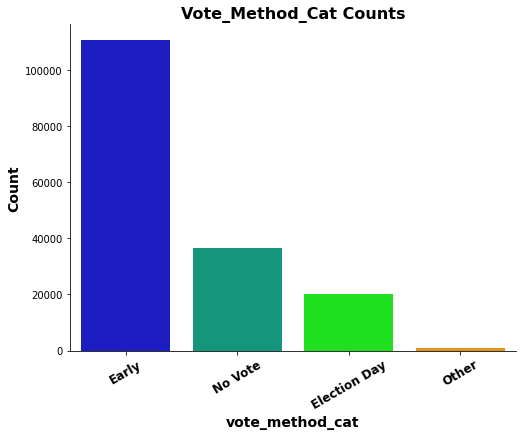

In [18]:
plot_count('vote_method_cat', df, rotation=30);

In [27]:
check_unique('birth_state', df).head(15)

,count,%
NC,46367,27.59
Missing,40772,24.26
NY,13211,7.86
OC,10042,5.97
SC,4753,2.83
NJ,4492,2.67
OH,4336,2.58
PA,4334,2.58
FL,3786,2.25
CA,3351,1.99


In [28]:
df['birth_state'].nunique()

57

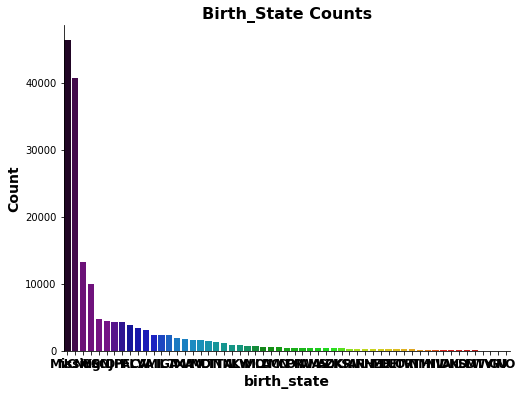

In [29]:
plot_count('birth_state', df)
plt.savefig('Figures/blog_bin_cat_features/birth_state_count', bbox_inches = "tight");

In [20]:
## Define function for grouping birth state/country into categories
def get_birth_reg(state):
    
    # check if U.S. territory or out of country
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT',
                     'NJ', 'NY', 'PA']:
        return 'Northeast'
    
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 
                     'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR',
                     'LA', 'OK', 'TX']:
        return 'South'
    
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI',
                     'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',
                     'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    
    else:
        return 'Missing'

In [21]:
## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
df['birth_reg'] = df['birth_state'].apply(get_birth_reg)
check_unique('birth_reg', df)

,count,%
South,70810,42.13
Missing,40773,24.26
Northeast,26291,15.64
Midwest,13749,8.18
Other,10535,6.27
West,5912,3.52


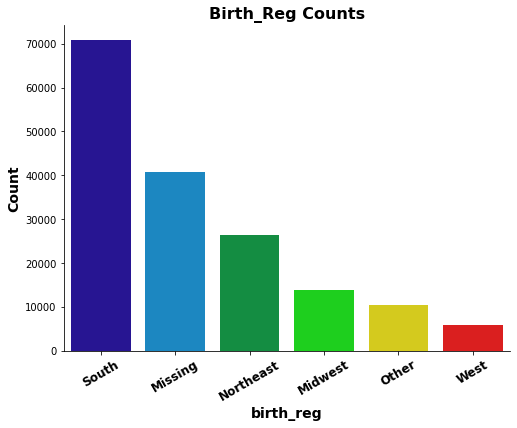

In [22]:
plot_count('birth_reg', df, rotation=30);